# Synthetic data for classification and clustering
## a.k.a. Generating plots for the week 3 lecture
Brooke Simmons, C53, Physics

There is a separate notebook for your coursework; this notebook contains the code for generating the plots in the lecture notes for this week, with the exception of the DBSCAN plot. That's because, as part of your coursework, you will be learning and implementing HDBSCAN.

We recommend you spend a bit of time understanding how the other clustering algorithms work from a technical/Python standpoint. The one you will work with in your coursework will be a bit different, but you will have a better time understanding the documentation and usage of a new algorithm if you have used similar packages in the past.

Plus, it's possible (**hint**) that this notebook contains some code you can adapt for various things, e.g. plotting, looping through parameters.

A basic dataset with 2 "samples", each of which is random around a specific point.


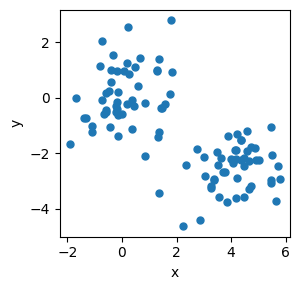

'\nFunnily enough, I didn\'t make a legend for any plots in this notebook.\nBut I have in the past found this code for tweaking how points show up in the\nlegend useful (changing the size of the markers relative to the size of the\nactual plotted points, or changing the alpha of the legend markers). \nSo I\'ll just leave them in a comment here, in case you need them at any point.\n(Also this is a note for future-Brooke that I can look here instead of\ngoogling this yet again the next time I need it. It used to be .legendHandles\nin an older version of matplotlib, instead of .legend_handles...)\n\nthe_leg = plt.legend(loc="upper left", markerscale=1.2)\nfor lh in the_leg.legend_handles: \n    lh.set_alpha(1)\n\n'

In [1]:
# In a single-file script it's usually best practice to put all the import
# statements at the top of the file (with some exceptions)
# but here I'm going to include import statements the first time we need them
# so you can more easily see what they're associated with.
import numpy as np
import matplotlib.pyplot as plt

# Jupyter-specific plot-shows-up-inline call
%matplotlib inline

np.random.seed(323) # setting the seed makes it repeatable
n_pts = 50

# do we want to save pretty plot files, or just view them on screen?
savefile=False


# these lines each generate [x, y] positions on the same line
# there will be an example below which generates them independently
data_twin1 = np.array([np.random.normal(0.0, 1.0, size=n_pts),
                       np.random.normal( 0.0, 1.0, size=n_pts)])
data_twin2 = np.array([np.random.normal(4.0, 1.0, size=n_pts),
                       np.random.normal(-2.5, 1.0, size=n_pts)])

# combined dataset with all [x, y]
data_twin = np.array([np.append(data_twin1[0], data_twin2[0]),
                      np.append(data_twin1[1], data_twin2[1])])


# quite small, but this means the fonts will be readable on a small screen
the_figsize = (3.1, 3)

fig = plt.figure(figsize=the_figsize)
plt.scatter(data_twin[0], data_twin[1], s=25.)
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()  # sometimes this prettifies plots, so it's worth a try.

# keep lists of all the files we've saved, if any
file_list       = []
file_list_png   = []
plot_kwargs     = {"transparent":True}
plot_kwargs_png = {"transparent":True, "dpi":300}

if savefile:
  filename = "data_twin_basic.pdf"
  filename_png = filename.replace(".pdf", ".png")
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)

# This notebook won't always print this helpful statement before each plot,
# but let's ease into grokking a plot from the code alone
print("A basic dataset with 2 \"samples\", each of which is random around a specific point.")
plt.show()


'''
Funnily enough, I didn't make a legend for any plots in this notebook.
But I have in the past found this code for tweaking how points show up in the
legend useful (changing the size of the markers relative to the size of the
actual plotted points, or changing the alpha of the legend markers).
So I'll just leave them in a comment here, in case you need them at any point.
(Also this is a note for future-Brooke that I can look here instead of
googling this yet again the next time I need it. It used to be .legendHandles
in an older version of matplotlib, instead of .legend_handles...)

the_leg = plt.legend(loc="upper left", markerscale=1.2)
for lh in the_leg.legend_handles:
    lh.set_alpha(1)

'''


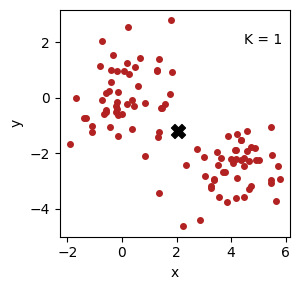

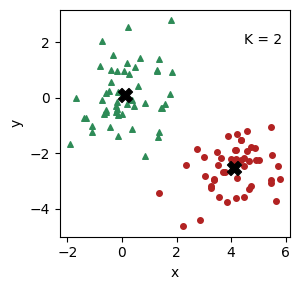

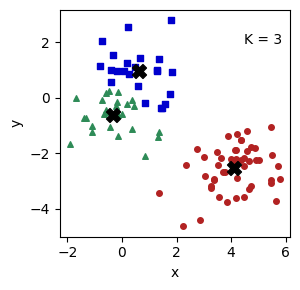

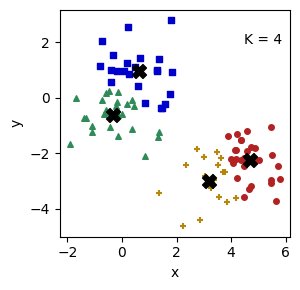

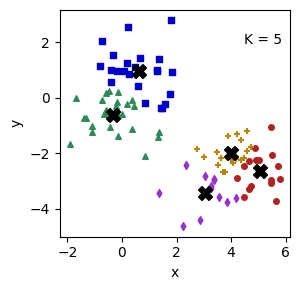

In [2]:
plt.clf(); plt.cla(); plt.close("all")
# ^ do we need to do this in Jupyter notebooks? I don't know, but it's habit
# if you work in the terminal and ipython shell, you DO need to do this regularly

from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# colours and marker styles to cycle through below
# note, if plotcol and plotmark have different lengths, then as you loop around
# below you will end up with unique combinations of point styles/colours
# the colours and marker styles are all built into matplotlib,
# documentation is googlable
# I picked things that should be reasonably colourblind friendly, but that is
# not guaranteed for all types of colourblindness (marker shape should help).
plotcol  = ["firebrick", "seagreen", "mediumblue", "darkgoldenrod", "darkorchid",
           "saddlebrown", "slategray", "teal", "peru", "steelblue", "olive", "plum",
           "yellowgreen", "lightcoral", "limegreen", "thistle", "indigo", "black"]
plotmark = ["o", "^", "s", "+", "d", "*", "h", "v", "p", "<", "D", ">"]


# We are going to plot the same thing with a bunch of different K values, so
# let's write a function.
# This will make each plot as its own object, versus making grids of subplots
# (which we will also do below).
def run_plot_kmeans(the_data, n_clusters, label_n=False, label_n_pos=None,
                    savefile=False):

  """
    run_plot_kmeans:    will run K-means clustering and make a plot of the output
                        for various values of K and any given data.
                        The data is assumed to be of the form [[x1, ..., xn],
                                                               [y1, ..., yn]]
                        because that's the form of most of the synthetic data
                        we generate here.


      Inputs:           the_data:     a numerical array of shape (n, 2)
                        n_clusters:   K, the number of clusters (int)
                                      could I have called it K? of course.
                                      I am also trying to make the point that it
                                      can be called any variable, that we just
                                      call it K because statisticians call it K
                                      as a standard, and that you need to think
                                      about what K is in the particular
                                      application you're using because they use
                                      K for a lot of variables.
                        label_n:      True if you want to label the K value on
                                      the plot.
                                      Optional, default value is False
                        label_n_pos:  a list, array or tuple of (x, y) positions
                                      in relative units (based on each axis going
                                      between 0 and 1).
                                      Only relevant if label_n == True.
                                      default value if not specified: [0.8, 0.9]
                                      (top right).
                        savefile:     boolean, True if you want to save the plot
                                      to a file (same usage as the cell above).


      Returns:          fig:          a matplotlib figure object
                        kmeans:       the KMeans object, so that you can work
                                      with the results in detail outside the
                                      function
                        score:        results of kmeans.score() so in principle
                                      redundant, but needed for later so it was
                                      more convenient to just return it separately

  """


  # KMeans requires data of the form
  # [[x1, y1], [x2, y2], ..., [xn, yn]]
  # whereas the_data looks like
  # [[x1, ..., xn], [y1, ..., yn]]
  # so we need to use the transpose of the_data

  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  kmeans.fit(the_data.T)
  score = kmeans.score(the_data.T)

  fig, ax = plt.subplots(figsize=the_figsize)
  for i in range(n_clusters):
    plt.scatter(the_data[0][kmeans.labels_ == i], the_data[1][kmeans.labels_== i],
                color=plotcol[i%len(plotcol)], marker=plotmark[i%len(plotmark)],
                s=16., label="$%d$" % i)
    # plt.scatter(kmeans.cluster_centers_.T[0][i], kmeans.cluster_centers_.T[1][i],
                # marker="x", color="k", s=100.)

  plt.scatter(kmeans.cluster_centers_.T[0], kmeans.cluster_centers_.T[1],
              marker="X", color="k", s=100.)
  plt.xlabel("x")
  plt.ylabel("y")

  if label_n:
    if label_n_pos is None:
      label_n_pos = [0.8, 0.9]

    plt.text(label_n_pos[0], label_n_pos[1], "K = %d" % n_clusters, ha='left',
             va='top', transform=ax.transAxes)

  plt.tight_layout()

  filename = "data_twin_k%d.pdf" % n_clusters
  filename_png = filename.replace(".pdf", ".png")
  if savefile:
    plt.savefig(filename,     **plot_kwargs)
    plt.savefig(filename_png, **plot_kwargs_png)
    file_list.append(filename)
    file_list_png.append(filename_png)

  return fig, kmeans, score
  # end of function, return to top-level program


# do the clustering, then show all the plots below, for a range of K
for j in range(5):
  fig, kmeans, score = run_plot_kmeans(data_twin, j+1, label_n=True,
                                       savefile=savefile)
  fig.show()




### Now make a more complex dataset with a non-linear distribution

In [3]:
# make 5 data subsets of size 50 points each
x1    = np.random.normal(-3.5, 0.1, size=n_pts)
y1    = np.random.normal( 1., 1.0, size=n_pts)
x2    = np.random.normal( 3.5, 0.1, size=n_pts)
y2    = np.random.normal( 1., 1.0, size=n_pts)
# datasets 3 and 4 are concentric circles in overall distribution shape
xtemp = np.random.normal( 0., 0.75, size=n_pts*2)
ytemp = np.random.normal( 0., 0.75, size=n_pts*2)
rad1  = np.sqrt(xtemp**2 + ytemp**2)
i_r   = np.argsort(rad1)
# it's not necessary to separate these into datasets 3 and 4 right here;
# this is now sorted so I could just do it with labelling later
# but it may help others follow along to be explicit that datasets
# 3 and 4 are quite artificially separated in this example
x3    = xtemp[i_r[:n_pts]]
y3    = ytemp[i_r[:n_pts]]
x4    = xtemp[i_r[n_pts:]]
y4    = ytemp[i_r[n_pts:]]
x5    = np.linspace(-3.25, 3.25, n_pts)
y5    = (x5/2.)**2 - 4 + np.random.normal(0., 0.5, n_pts)

x_all = np.append(x1, [x2, x3, x4, x5])
y_all = np.append(y1, [y2, y3, y4, y5])

# fun fact: there's also a np.zeros_like() that makes a zero-valued array
#           with the same other properties as the array you give it
label_ones = np.ones_like(x1).astype(int)
data_u = np.array([x_all, y_all])
labels = np.append(label_ones, [label_ones+1, label_ones+2,
                                label_ones+3, label_ones+4])


print(np.shape(labels), np.shape(data_u))
# print(labels)

(250,) (2, 250)


Here's our randomly generated data with "ground truth" labels:


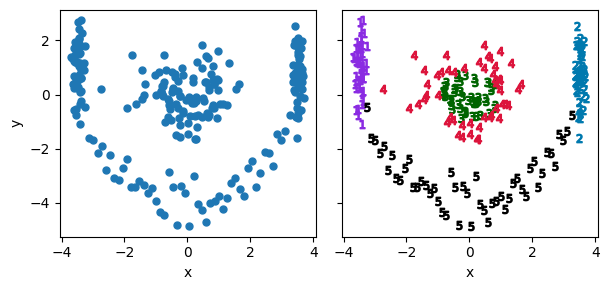

In [4]:

xsize, ysize = the_figsize # break out of the tuple

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(xsize*2., ysize),
                        sharex=True, sharey=True)

# this is just convenient to keep left/right clear below
ax_l = axs[0]
ax_r = axs[1]

# plot the original data, with (R) and without (L) labels
ax_l.scatter(data_u[0], data_u[1], s=25.)

ax_r.scatter(x1, y1, c="blueviolet", marker="$1$")
ax_r.scatter(x2, y2, c="#0079AE",    marker="$2$")
ax_r.scatter(x3, y3, c="darkgreen",  marker="$3$")
ax_r.scatter(x4, y4, c="crimson",    marker="$4$")
ax_r.scatter(x5, y5, c="k",          marker="$5$")


ax_l.set_ylabel("y")
ax_l.set_xlabel("x")
ax_r.set_xlabel("x")
plt.tight_layout()

filename = "data_u_basic.pdf"
filename_png = filename.replace(".pdf", ".png")
if savefile:
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)

print("Here's our randomly generated data with \"ground truth\" labels:")
plt.show()



### K-means clustering on the new dataset: let's try it

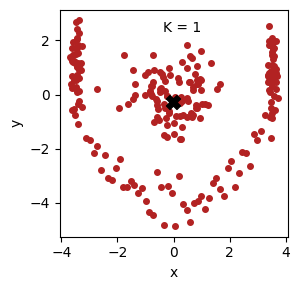

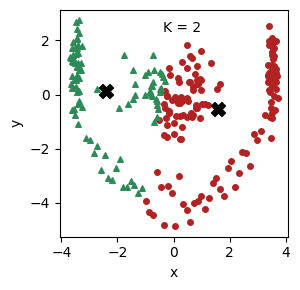

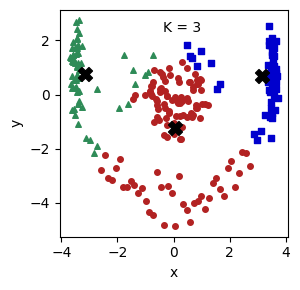

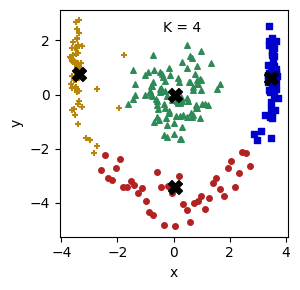

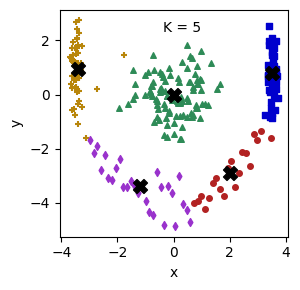

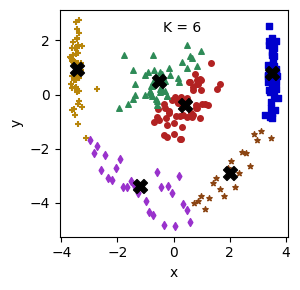

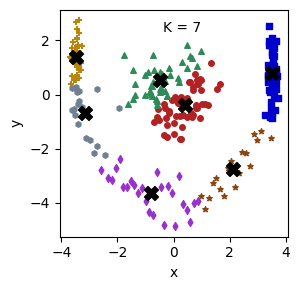

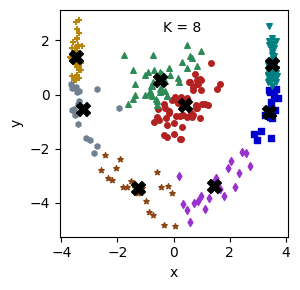

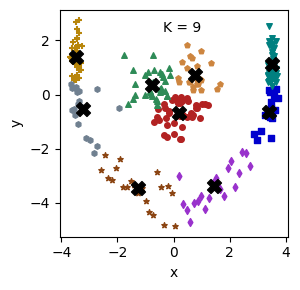

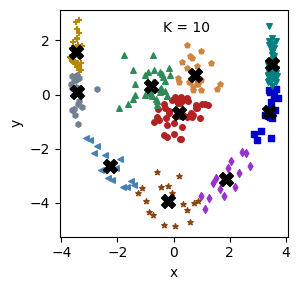

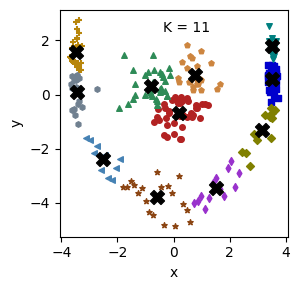

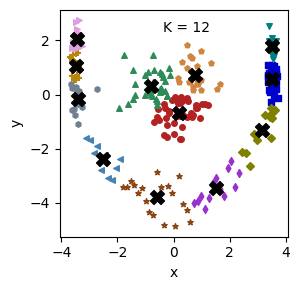

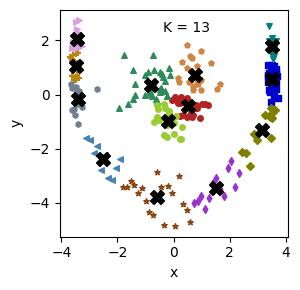

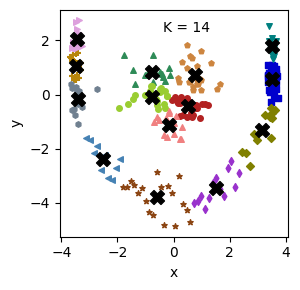

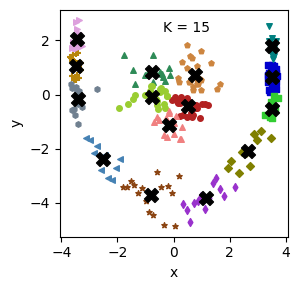

In [5]:
max_clusters = 15

# We are going to try many different values of K, and store all the results
kmeans_u = []
score_u  = []


for j in range(max_clusters):
  # also let's plot because why notttttt
  fig, kmeans, score = run_plot_kmeans(data_u, j+1, label_n=True,
                                       label_n_pos=[0.45, 0.95])
  fig.show()
  # save the values
  kmeans_u.append(kmeans)
  score_u.append(score)

  # also save the files
  # btw the name is outside the if statement because, on Colab, you can also
  # download the file, but you might want to save but not download or vice-versa
  filename = "data_u_k%d.pdf" % (j+1)
  filename_png = filename.replace(".pdf", ".png")
  if savefile:
    plt.savefig(filename,     **plot_kwargs)
    plt.savefig(filename_png, **plot_kwargs_png)
    file_list.append(filename)
    file_list_png.append(filename_png)

### Evaluate how we choose a good cluster size

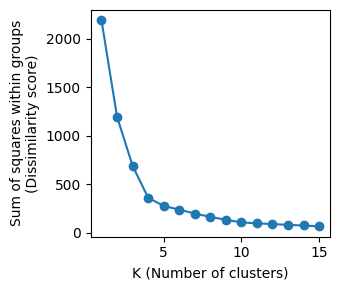

In [6]:
fig = plt.figure(figsize=(xsize+0.4, ysize))

# fun fact: KMeans returns the "opposite" (negative) of the dissimilarity score,
# so we need to reverse it again before plotting
# how did I know that? I read the documentation.
plt.plot(np.array(range(max_clusters))+1, -1.*np.array(score_u), marker="o")
plt.xlabel("K (Number of clusters)")
plt.ylabel("Sum of squares within groups\n(Dissimilarity score)")
plt.tight_layout()

filename="kmeans_u_dissimilar_k.pdf"
filename_png = filename.replace(".pdf", ".png")
if savefile:
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)

plt.show()


## Let's do some hierarchical clustering

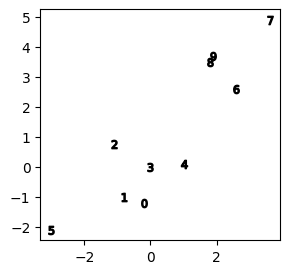

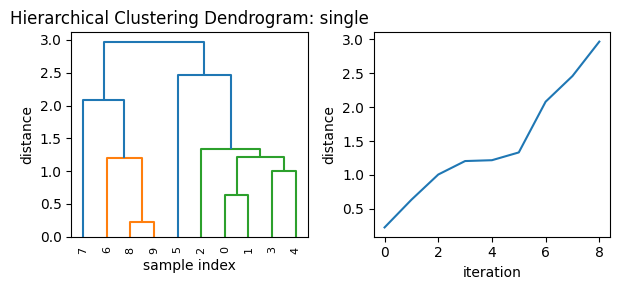

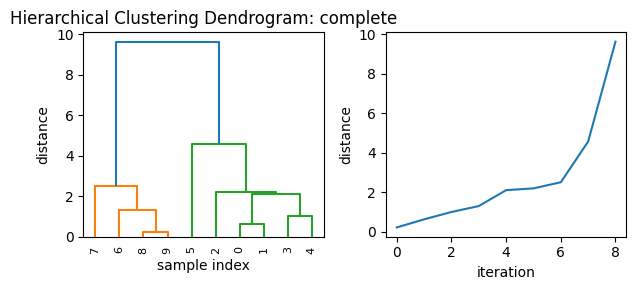

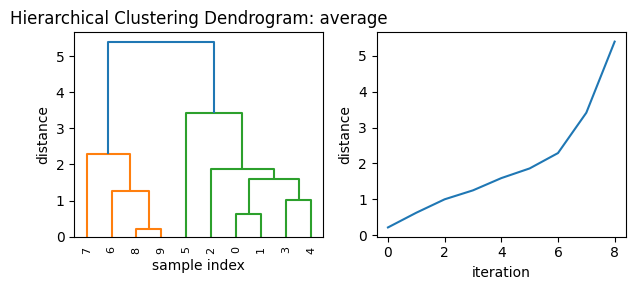

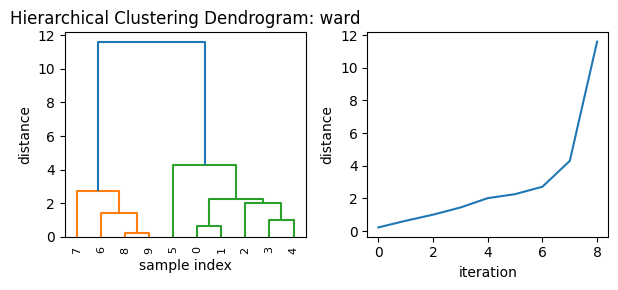

In [7]:
# Let's do Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaders
# from sklearn.cluster import DBSCAN
# from scipy.spatial.distance import cdist, pdist

def plot_dendrogram(the_linkage, cluster_method, d_max=None):

  """
    plot_dendrogram:  assuming a hierarchical linkage has already been created,
                      plot the dendrogram, and how the distance iterates


    Inputs:           the_linkage:  a linkage object returned by the linkage()
                                    method imported below
                      cluster_method: (str) the method used for clustering.
                                    only used to print the plot title.
                      d_max:        (float) a distance value to plot a horizontal
                                    line across the dendrogram.
                                    Optional, default is to not plot this.

    Returns:          fig:          a matplotlib figure object, for saving/showing

  """

  fig = plt.figure(figsize=(xsize*2., ysize))
  # add the subplots one at a time because dendrogram() will
  # just plot in the current axis
  axL = fig.add_subplot(1,2,1)
  axL.set_title('Hierarchical Clustering Dendrogram: %s' % cluster_method)
  axL.set_xlabel('sample index')
  axL.set_ylabel('distance')

  # dendrogram was imported above, it also makes a plot, so we are using that
  # despite having to work around some of its limitations/assumptions
  dendrogram(
      the_linkage,
      leaf_rotation=90.,  # rotates the x axis labels
      leaf_font_size=8.,  # font size for the x axis labels
  )

  # ok, add the distance vs iteration plot
  axR = fig.add_subplot(1,2,2)
  # how did I know this is where the distance is stored? I read the documentation,
  # but the docs were kind of sparse so I plotted/printed it to check it was right
  # I wish I could promise you that documentation was always perfect. Alas
  axR.plot(the_linkage[:,2])

  # plot the distance cutoff, if specified
  if d_max is not None:
    # freeze the current xlimits
    xlimits = axL.get_xlim()
    axL.plot(xlimits, np.array([d_max, d_max]), linestyle='-', color="#777777")
    axL.set_xlim(xlimits)

    # freeze the current ylimits
    xlimits = axR.get_xlim()
    axR.plot(xlimits, np.array([d_max, d_max]), linestyle='-', color="#777777")
    axR.set_xlim(xlimits)


  axR.set_xlabel('iteration')
  axR.set_ylabel('distance')

  plt.tight_layout()

  return fig
  # End of function, return to normal programming


# Let's loop through the different cluster distance methods/measures
# note, these are the specific strings the linkage() method below expects
# for each of these distance measures
cluster_method = ["single", "complete", "average", "ward"]

# We'll start with a very basic, manually created, dataset of 10 points
basic_x = [-0.2, -0.8, -1.1, 0., 1.0, -3.0, 2.6, 3.6, 1.8, 1.9]
basic_y = [-1.2, -1.0, 0.75, 0., 0.1, -2.1, 2.6, 4.9, 3.5, 3.7]
basic_labels = ["$0$", "$1$", "$2$", "$3$", "$4$", "$5$", "$6$", "$7$", "$8$", "$9$"]

# linkage() takes a single input: this is data prep
basic_xy = np.array([basic_x, basic_y])

# make a plot of the overall dataset first
fig_basic = plt.figure(figsize=the_figsize)
for i in range(len(basic_x)):
  plt.scatter(basic_x[i], basic_y[i], s=36., c="k", marker=basic_labels[i])

if savefile:
  filename="xy10_basic.pdf"
  plt.savefig(filename, **plot_kwargs)
  file_list.append(filename)

fig_basic.show()

# do the clustering, and plot it
# for this basic dataset we can just plot, not save anything into variables
# because we don't need it outside the loop
for the_method in cluster_method:
  the_linkage = linkage(basic_xy.T, the_method)

  fig = plot_dendrogram(the_linkage, the_method)
  filename="xy10_dendrogram_%s.pdf" % the_method
  filename_png = filename.replace(".pdf", ".png")
  if savefile:
    plt.savefig(filename,     **plot_kwargs)
    plt.savefig(filename_png, **plot_kwargs_png)
    file_list.append(filename)
    file_list_png.append(filename_png)


  fig.show()


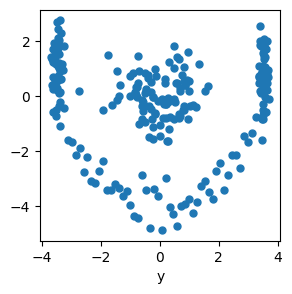

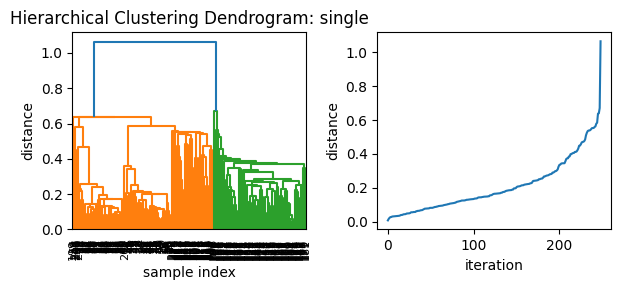

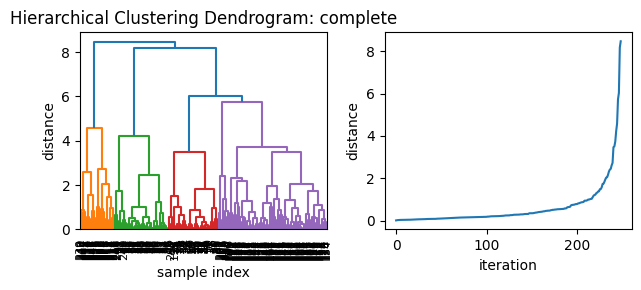

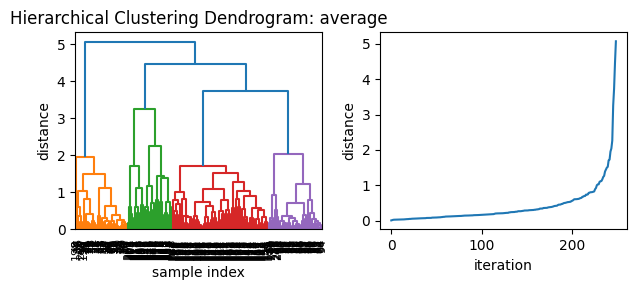

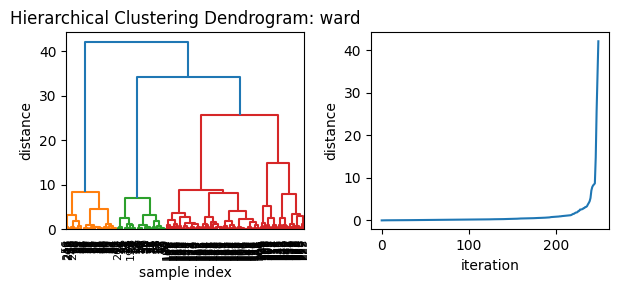

In [8]:
# Now do the same, but with the more complex dataset, data_u

# just make the clean plot so we don't have to keep scrolling up
fig_points = plt.figure(figsize=the_figsize)

plt.scatter(data_u[0], data_u[1], s=25.)
plt.xlabel("x")
plt.xlabel("y")

fig_points.show()

# now cluster using the various dissimilarity measures
# and save them each into a list so we can use them later
linkages = []
for the_method in cluster_method:
  the_linkage = linkage(data_u.T, the_method)

  # the .copy() may not be needed, but I'm just being careful
  # as we are rewriting the_linkage with every iteration of the loop
  linkages.append(the_linkage.copy())

  fig = plot_dendrogram(the_linkage, the_method)
  filename="data_u_agglom_dendrograms_%s.pdf" % the_method
  filename_png = filename.replace(".pdf", ".png")
  if savefile:
    plt.savefig(filename,     **plot_kwargs)
    plt.savefig(filename_png, **plot_kwargs_png)
    file_list.append(filename)
    file_list_png.append(filename_png)

  fig.show()


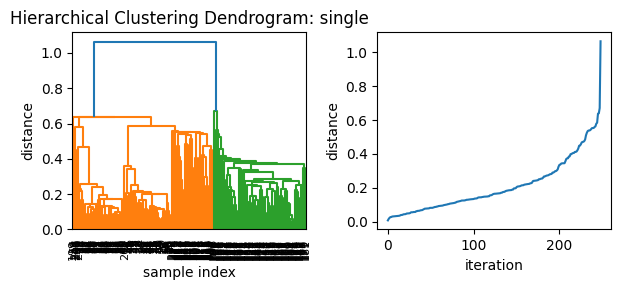

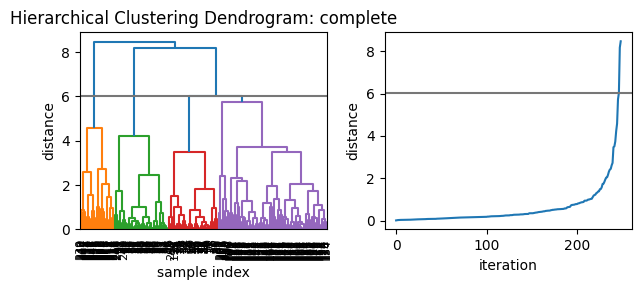

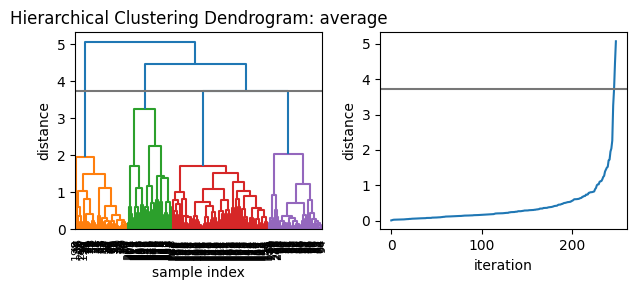

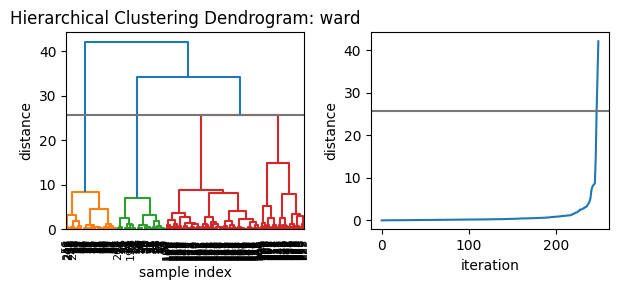

In [9]:
# Now we want to pick a specific partition, and re-plot

# Choose 4 clusters as a cutoff; of course you may make different
# choices for different datasets
n_clusters = 4
clusters_all = []
leaders_all  = []

for i, the_method in enumerate(cluster_method):
  the_linkage = linkages[i]
  # to find the exact distance at which there are 4 clusters, let's start
  # at the top of the tree and move down
  # again, the [:,3] comes from the documentation and trial and error when
  # the documentation was so sparse as to be deeply unhelpful
  first_cut_linkage = the_linkage[(the_linkage[:,3] <= n_clusters)]
  d_guess = first_cut_linkage[:,2][-1] + .01


  # if we didn't need the actual distance we can just tell it
  # to return 4 clusters. That would be cool, if we wanted to choose on the
  # number of clusters
  # (but it doesn't then return the distance at which that is the cutoff)
  clusters_all.append(fcluster(the_linkage, n_clusters, criterion="maxclust"))
  this_leader = leaders(the_linkage, clusters_all[i])
  leaders_all.append(this_leader)

  i_top = np.where(this_leader[1] == n_clusters)
  i_cut = the_linkage[:,1] == this_leader[0][i_top[0]]

  d_guess = the_linkage[:,2][i_cut]

  fig = plot_dendrogram(the_linkage, the_method, d_max=d_guess)
  filename="data_u_agglom_dendrograms_%s_withdist.pdf" % the_method
  filename_png = filename.replace(".pdf", ".png")
  if savefile:
    plt.savefig(filename,     **plot_kwargs)
    plt.savefig(filename_png, **plot_kwargs_png)
    file_list.append(filename)
    file_list_png.append(filename_png)

  fig.show()



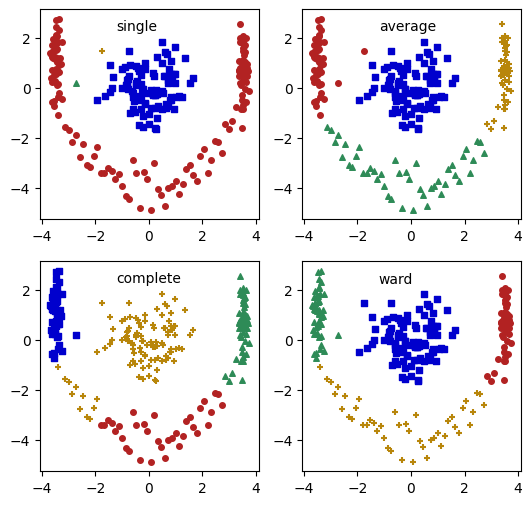

In [10]:
# Now plot the results of the clustering with K=4

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(xsize*2., ysize*2.))

label_n_pos = [0.35, 0.95]

# It's much cleaner to loop through plot axes, although it can make the more
# compact code a bit harder to read
for i, the_method in enumerate(cluster_method):
  i_ax = (i%2, i//2) # tuples can be passed to arrays as multi-indices
                     # unlike lists or arrays

  # we know this is 4 from above, but it's still nice to generalise code
  # if it's relatively convenient
  n_cl = np.max(clusters_all[i])

  # plot each cluster; use the markers and colours from the top of this notebook
  for i_cl in range(n_cl):
    # define a subset of the full dataset; if you are confused about what this
    # line does, print out in_this_cluster
    in_this_cluster = clusters_all[i] == i_cl+1
    axs[i_ax].scatter(data_u[0][in_this_cluster], data_u[1][in_this_cluster],
                      color=plotcol[i_cl%len(plotcol)],
                      marker=plotmark[i_cl%len(plotmark)],
                      s=16., label="$%d$" % i_cl)

  # now that all points are plotted, label the plot with the method
  plt.text(label_n_pos[0], label_n_pos[1], the_method, ha='left', va='top',
           transform=axs[i_ax].transAxes)

filename="data_u_agglom_clusters_%s.pdf" % the_method
filename_png = filename.replace(".pdf", ".png")
if savefile:
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)

  # in this cell only, print out the filenames, if any were saved.
  print("Files saved (PDF names only; there are also png files):")
  for i_file, thefile in enumerate(file_list):
    print("%2d: %s" % (i_file, thefile))


plt.show()


# Let's Try Classification

Worked example: K-Nearest Neighbours

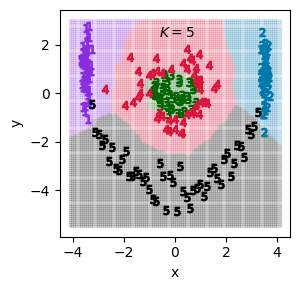

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# KNeighborsClassifier() wants the data in (x, y) pairs as well, so, transpose
# this is using the whole of data_u as training data
knn.fit(data_u.T, labels)

# Create a grid of uniformly-spaced points along both axes
# We will use this to visualise the prediction space of the KNN result
x_grid = np.linspace(-4.1, 4.1, num=100)
y_grid = np.linspace(-5.5, 3.0, num=100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
# put the mesh points into the format needed by KNeighborsClassifier.predict()
xy_mesh = np.array([x_mesh.flatten(), y_mesh.flatten()]).T
# do the prediction
xy_predict = knn.predict(xy_mesh)


# the original colours in the data_u plot
classcolors = ["blueviolet", "#0079AE", "darkgreen", "crimson", "k"]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=the_figsize,
                       sharex=True, sharey=True)

# we know there are 5 classes, intrinsically, and in one of the early cells
# above we defined them as the integers from 1 through 5.
all_labels = [1, 2, 3, 4, 5]

# extract the gridpoints for each label and plot them separately
for j_label in all_labels:
  i_thislabel = xy_predict == j_label

  this_xymesh = xy_mesh[i_thislabel].T
  # print(this_xymesh)

  ax.scatter(this_xymesh[0], this_xymesh[1], c=classcolors[j_label-1], s=1.,
             marker="s", alpha=0.1)

# re-plot the ground truth in the same colours as the prediction grid
ax.scatter(x1, y1, c=classcolors[0], marker="$1$")
ax.scatter(x2, y2, c=classcolors[1], marker="$2$")
ax.scatter(x3, y3, c=classcolors[2], marker="$3$")
ax.scatter(x4, y4, c=classcolors[3], marker="$4$")
ax.scatter(x5, y5, c=classcolors[4], marker="$5$")

plt.text(0.43, 0.93, "$K=5$", ha='left', va='top', transform=ax.transAxes)

ax.set_ylabel("y")
ax.set_xlabel("x")
plt.tight_layout()

filename = "data_u_knn_k5.pdf"
filename_png = filename.replace(".pdf", ".png")
if savefile:
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)


plt.show()

Now let's do this for a range of values of K.

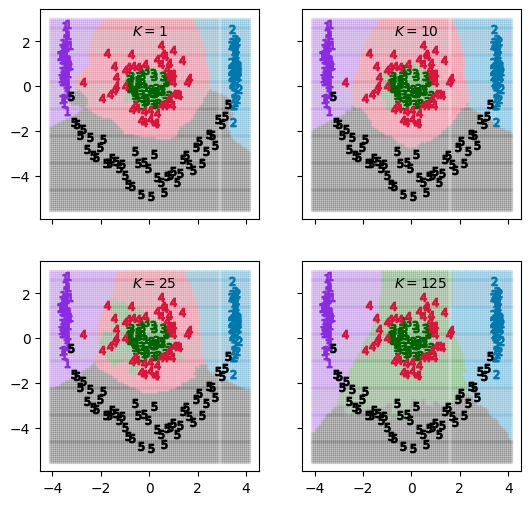

In [12]:
# use the same xy_mesh as above
# save predictions as we loop through
xy_predict_all = []

# choose a range of K values, from "just use the single nearest point"
# to "use half the dataset" to determine predicted class
k_all = [1, 10, 25, 125]

for k in k_all:

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(data_u.T, labels)
  xy_predict_all.append(knn.predict(xy_mesh))



xsize, ysize = the_figsize # break out of the tuple
# note "k" as a colour string in matplotlib is just black. Not KNN, K-Means, etc
classcolors = ["blueviolet", "#0079AE", "darkgreen", "crimson", "k"]
# manually pick a position for labelling the K value on each plot
label_n_pos = [0.42, 0.93]


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(xsize*2, ysize*2),
                        sharex=True, sharey=True)

# make a 2x2 grid of subplots
# you could try other grid sizes, by the way, and changing to e.g. a 2x3 grid
# is a good way to work out how plotting subplots actually works
for i, k in enumerate(k_all):
  i_ax = (i//2, i%2) # this usage is explained in a different loop above

  # first plot the grid of predicted labels, then plot the true data on top
  for j_label in all_labels:
    i_thislabel = xy_predict_all[i] == j_label

    this_xymesh = xy_mesh[i_thislabel].T

    axs[i_ax].scatter(this_xymesh[0], this_xymesh[1], c=classcolors[j_label-1],
                      s=1., marker="s", alpha=0.1)

  axs[i_ax].scatter(x1, y1, c=classcolors[0], marker="$1$")
  axs[i_ax].scatter(x2, y2, c=classcolors[1], marker="$2$")
  axs[i_ax].scatter(x3, y3, c=classcolors[2], marker="$3$")
  axs[i_ax].scatter(x4, y4, c=classcolors[3], marker="$4$")
  axs[i_ax].scatter(x5, y5, c=classcolors[4], marker="$5$")

  plt.text(label_n_pos[0], label_n_pos[1], "$K = %d$" % k, ha='left', va='top',
           transform=axs[i_ax].transAxes)




# ax.set_ylabel("y")
# ax.set_xlabel("x")
# plt.tight_layout() # lol try uncommenting this, it did *not* work well for me

# we particularly need the PNG for this one because I did not make any attempt
# to control the size of the vector plot object and each grid has 10k points
# so it takes a while to render the 2x2 grid of fine grids in pdf/eps/etc

filename = "data_u_knn_multik.pdf"
filename_png = filename.replace(".pdf", ".png")
if savefile:
  plt.savefig(filename,     **plot_kwargs)
  plt.savefig(filename_png, **plot_kwargs_png)
  file_list.append(filename)
  file_list_png.append(filename_png)


plt.show()